In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from config_weather import weather_api_key

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [26]:
#adding date to convert data whenever doing analysis of plots
today = pd.Timestamp("today").strftime("%m/%d/%Y")

In [3]:
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

In [6]:
#setting up test city
#so layed out one city set to get the specific directions to draw that specific data out as shown below
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
num_city = 0
set_num = 1
name_of_city = cities[0]

query_url = f'{url}appid={weather_api_key}&q={name_of_city}&units={units}'
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4, sort_keys=True))

#want: city, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date

{
    "base": "stations",
    "clouds": {
        "all": 91
    },
    "cod": 200,
    "coord": {
        "lat": -3.8004,
        "lon": 102.2655
    },
    "dt": 1612132791,
    "id": 1649150,
    "main": {
        "feels_like": 79.5,
        "grnd_level": 1008,
        "humidity": 81,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 74.95,
        "temp_max": 74.95,
        "temp_min": 74.95
    },
    "name": "Bengkulu",
    "sys": {
        "country": "ID",
        "sunrise": 1612134976,
        "sunset": 1612179157
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 39,
        "speed": 4.34
    }
}


In [7]:
print(f'Beginning Data Retrieval')     
print(f'-----------------------------')

#making lists of data
cities_names = []
list_Lat = []
list_Lng = []
max_temps = []
list_of_humidity = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

#from there, we want to go through each city in the list of cities
#withdraw data for each city in query_url
for city in cities:
    try:
        name_of_city = city
        query_url = f'{url}appid={weather_api_key}&q={name_of_city}&units={units}'
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
#collecting Lat of specific city in cities       
        Lat = weather_json['coord']['lat']
       
#collecting Lng of specific city in cities
        Lng = weather_json['coord']['lon']
    
#collecting max temp of specific city in cities
        temp = weather_json['main']['temp_max']
       
#collecting humidity of specific city in cities
        humidity = weather_json['main']['humidity']
      
#collecting cloudiness of specific city in cities
        clouds = weather_json['clouds']['all']
        
#collecting wind speed of specific city in cities
        wind = weather_json['wind']['speed']
        
#collecting country of specific city in cities
        country = weather_json['sys']['country']
       
#collecting date of specific city in cities
        date = weather_json['dt']
        
        cities_names.append(name_of_city)
        list_Lat.append(Lat)
        list_Lng.append(Lng)
        max_temps.append(temp)
        list_of_humidity.append(humidity)
        cloudiness.append(clouds)
        wind_speeds.append(wind)
        countries.append(country)
        dates.append(date)
        
        print(f'Processing Record {num_city} of Set {set_num} |{city}')

        num_city = num_city + 1
        if num_city >= 50:
            num_city = 0
            set_num = set_num + 1
        
    except:
        bold = '\033[1m not \033[0m'
        print(f'City {bold} found. Skipping...')

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 |bengkulu
Processing Record 1 of Set 1 |rawson
Processing Record 2 of Set 1 |dikson
Processing Record 3 of Set 1 |longyearbyen
Processing Record 4 of Set 1 |kununurra
Processing Record 5 of Set 1 |tuktoyaktuk
Processing Record 6 of Set 1 |olga
Processing Record 7 of Set 1 |faanui
Processing Record 8 of Set 1 |bredasdorp
Processing Record 9 of Set 1 |punta arenas
Processing Record 10 of Set 1 |bluff
Processing Record 11 of Set 1 |albany
City  not  found. Skipping...
Processing Record 12 of Set 1 |mar del plata
Processing Record 13 of Set 1 |khatanga
Processing Record 14 of Set 1 |mataura
Processing Record 15 of Set 1 |cape town
Processing Record 16 of Set 1 |aktash
City  not  found. Skipping...
City  not  found. Skipping...
Processing Record 17 of Set 1 |provideniya
Processing Record 18 of Set 1 |padang
City  not  found. Skipping...
Processing Record 19 of Set 1 |cockburn town
Processing Record 20 of Set

City  not  found. Skipping...
Processing Record 36 of Set 4 |kargasok
Processing Record 37 of Set 4 |bako
Processing Record 38 of Set 4 |kodiak
Processing Record 39 of Set 4 |nelson
Processing Record 40 of Set 4 |sioux lookout
Processing Record 41 of Set 4 |clyde river
Processing Record 42 of Set 4 |pevek
Processing Record 43 of Set 4 |hope
Processing Record 44 of Set 4 |scottsboro
Processing Record 45 of Set 4 |maniitsoq
Processing Record 46 of Set 4 |lasa
Processing Record 47 of Set 4 |esperance
Processing Record 48 of Set 4 |manokwari
Processing Record 49 of Set 4 |wuzhou
Processing Record 0 of Set 5 |sinnar
Processing Record 1 of Set 5 |jumla
Processing Record 2 of Set 5 |cayenne
Processing Record 3 of Set 5 |belle fourche
Processing Record 4 of Set 5 |kapit
Processing Record 5 of Set 5 |zamora
Processing Record 6 of Set 5 |alofi
City  not  found. Skipping...
Processing Record 7 of Set 5 |marzuq
Processing Record 8 of Set 5 |bereznehuvate
Processing Record 9 of Set 5 |naze
Processi

Processing Record 26 of Set 8 |charters towers
Processing Record 27 of Set 8 |quelimane
Processing Record 28 of Set 8 |kaeo
Processing Record 29 of Set 8 |beroroha
Processing Record 30 of Set 8 |tiznit
Processing Record 31 of Set 8 |yuzhne
Processing Record 32 of Set 8 |buin
Processing Record 33 of Set 8 |yenagoa
Processing Record 34 of Set 8 |tazovskiy
Processing Record 35 of Set 8 |dudinka
Processing Record 36 of Set 8 |iquique
Processing Record 37 of Set 8 |ak-dovurak
Processing Record 38 of Set 8 |monze
Processing Record 39 of Set 8 |poum
Processing Record 40 of Set 8 |laguna
Processing Record 41 of Set 8 |merritt island
Processing Record 42 of Set 8 |auki
Processing Record 43 of Set 8 |adrar
Processing Record 44 of Set 8 |pitimbu
Processing Record 45 of Set 8 |putina
Processing Record 46 of Set 8 |teacapan
Processing Record 47 of Set 8 |port hedland
City  not  found. Skipping...
Processing Record 48 of Set 8 |omuta
Processing Record 49 of Set 8 |medea
Processing Record 0 of Set 9 

In [8]:
#convert data into dataframe
data = {'City': cities_names,
        'Lat': list_Lat,
        'Lng': list_Lng,
        'Max_Temp': max_temps,
        'Humidity': list_of_humidity,
        'Cloudiness': cloudiness,
        'Wind_Speed': wind_speeds,
        'Country': countries,
        'Date': dates}

#making dataframe
weather_df = pd.DataFrame(data)

#giving name to index for csv file header
weather_df.index.names = ['City_ID']
weather_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
0,bengkulu,-3.8004,102.2655,74.95,81,91,4.34,ID,1612132791
1,rawson,-43.3002,-65.1023,74.17,34,26,25.88,AR,1612132582
2,dikson,73.5069,80.5464,-26.90,79,61,8.81,RU,1612132792
3,longyearbyen,78.2186,15.6401,3.20,33,0,14.97,SJ,1612132792
4,kununurra,-15.7667,128.7333,78.80,77,75,2.33,AU,1612132523
...,...,...,...,...,...,...,...,...,...
529,salo,45.6086,10.5310,45.00,93,40,1.14,IT,1612132954
530,dakar,14.6937,-17.4441,75.20,46,0,11.50,SN,1612132932
531,pokhara,28.2333,83.9833,47.53,50,0,3.71,NP,1612132888


In [9]:
#create csv file of above dataframe
weather_df.to_csv(output_data_file, index = True, header = True)

In [10]:
#retrieval of information into summary dataframe
#adjusted dataframe to include all index values, but not the 'City' column
adjusted_df = weather_df.loc[:, weather_df.columns != 'City']

#retrieving data for all columns in new dataframe
count = adjusted_df.count()
mean = adjusted_df.mean()
std = adjusted_df.std()
min_values = adjusted_df.min()
one_quantile = adjusted_df.quantile(.25)
two_quantile = adjusted_df.quantile(.5)
three_quantile = adjusted_df.quantile(.75)
max_values = adjusted_df.max()

#making dataframe
index_name = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
analy_data = [count, mean, std, min_values, one_quantile, two_quantile, three_quantile, max_values]
compiled_weather_df = pd.DataFrame(analy_data, columns = ['Lat', 'Lng', 'Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed', 'Date'], index = index_name)
compiled_weather_df

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02
mean,19.400336,13.867989,49.919082,73.904494,55.945693,8.167303,1.612133e+09
std,33.463803,89.707297,32.445099,18.934771,38.394844,6.001190,9.789033e+01
min,-54.800000,-175.200000,-45.380000,9.000000,0.000000,0.130000,1.612132e+09
25%,-8.919400,-64.529375,29.242500,66.000000,20.000000,3.800000,1.612133e+09
50%,22.912100,19.637400,62.600000,78.000000,71.000000,6.910000,1.612133e+09
75%,47.458475,90.505025,75.985000,88.000000,92.000000,11.495000,1.612133e+09
max,78.218600,178.416700,89.600000,100.000000,100.000000,51.450000,1.612133e+09


In [45]:
#removing data with cities that have humidity > 100%
index_names = weather_df[weather_df['Humidity'] > 100].index 

#displaying indices of cities with humidity over 100%
index_names

Int64Index([], dtype='int64', name='City_ID')

In [46]:
clean_city_data = weather_df.drop(index_names, inplace = False)
clean_city_data

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
0,bengkulu,-3.8004,102.2655,74.95,81,91,4.34,ID,1612132791
1,rawson,-43.3002,-65.1023,74.17,34,26,25.88,AR,1612132582
2,dikson,73.5069,80.5464,-26.90,79,61,8.81,RU,1612132792
3,longyearbyen,78.2186,15.6401,3.20,33,0,14.97,SJ,1612132792
4,kununurra,-15.7667,128.7333,78.80,77,75,2.33,AU,1612132523
...,...,...,...,...,...,...,...,...,...
529,salo,45.6086,10.5310,45.00,93,40,1.14,IT,1612132954
530,dakar,14.6937,-17.4441,75.20,46,0,11.50,SN,1612132932
531,pokhara,28.2333,83.9833,47.53,50,0,3.71,NP,1612132888


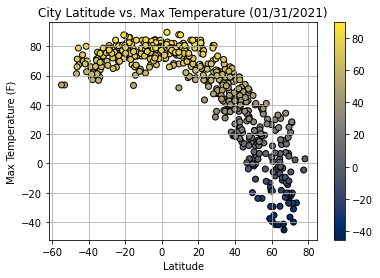

In [157]:
#latitude vs temp plot
x = clean_city_data['Lat']
y = clean_city_data['Max_Temp']
t = y
lat_temp_plot = plt.scatter(x, y, c = t, cmap = 'cividis', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({today})')

#png
output_data_file = 'output_data/General_Plotted_Figures/lat_temp_plot.png'
plt.savefig(output_data_file)

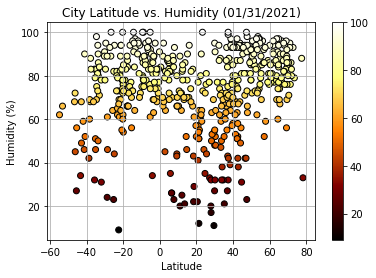

In [158]:
#latitude vs humidity plot
x = clean_city_data['Lat']
y = clean_city_data['Humidity']
t = y
lat_humidity_plot = plt.scatter(x, y, c = t, cmap = 'afmhot', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({today})')

#png
output_data_file = 'output_data/General_Plotted_Figures/lat_humidity_plot.png'
plt.savefig(output_data_file)

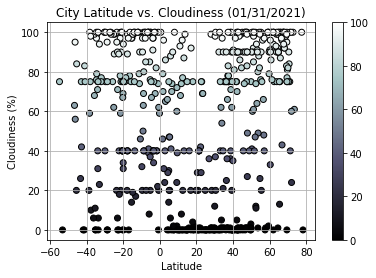

In [159]:
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']
t = y
lat_cloudiness_plot = plt.scatter(x, y, c = t, cmap = 'bone', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({today})')

#png
output_data_file = 'output_data/General_Plotted_Figures/lat_cloudiness_plot.png'
plt.savefig(output_data_file)

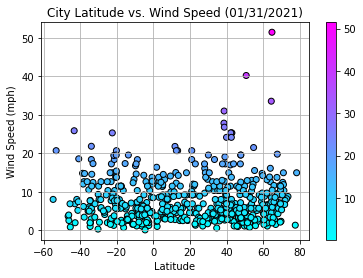

In [160]:
x = clean_city_data['Lat']
y = clean_city_data['Wind_Speed']
t = y
lat_wind_speed_plot = plt.scatter(x, y, c = t, cmap = 'cool', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({today})')

#png
output_data_file = 'output_data/General_Plotted_Figures/lat_wind_speed_plot.png'
plt.savefig(output_data_file)

In [161]:
#Southern Hemisphere
#finding northern hemisphere values
northern_hemisphere = clean_city_data[clean_city_data['Lat'] > 0].index 
print(northern_hemisphere)

#dropping northern values
south_data = clean_city_data.drop(northern_hemisphere, inplace = False)
south_data

Int64Index([  2,   3,   5,   6,  11,  13,  16,  17,  19,  20,
            ...
            519, 521, 522, 523, 525, 526, 528, 529, 530, 531],
           dtype='int64', name='City_ID', length=354)


,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
0,bengkulu,-3.8004,102.2655,74.95,81,91,4.34,ID,1612132791
1,rawson,-43.3002,-65.1023,74.17,34,26,25.88,AR,1612132582
4,kununurra,-15.7667,128.7333,78.80,77,75,2.33,AU,1612132523
7,faanui,-16.4833,-151.7500,81.54,75,78,10.36,PF,1612132793
8,bredasdorp,-34.5322,20.0403,63.00,83,99,1.99,ZA,1612132793
...,...,...,...,...,...,...,...,...,...
520,mount isa,-20.7333,139.5000,87.80,55,100,5.75,AU,1612132952
524,monteagudo,-19.8167,-63.9833,75.20,73,75,2.30,BO,1612132953
527,tefe,-3.3542,-64.7114,78.80,89,40,5.75,BR,1612132953


The r-value is 0.4687375708222291.


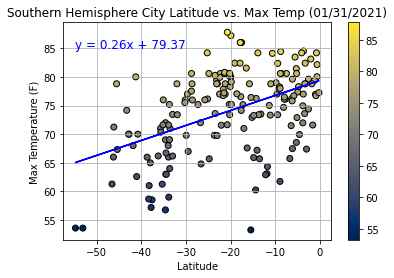

In [162]:
#Southern Max Temp vs Latitude Linear Regression
x = south_data['Lat']
y = south_data['Max_Temp']
t = y
south_lat_temp_plot = plt.scatter(x, y, c = t, cmap = 'cividis', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere City Latitude vs. Max Temp ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(-55, 85, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Southern_Hemisphere_Figures/south_lat_temp_plot.png'
plt.savefig(output_data_file)

The r-value is 0.3678202516796612.


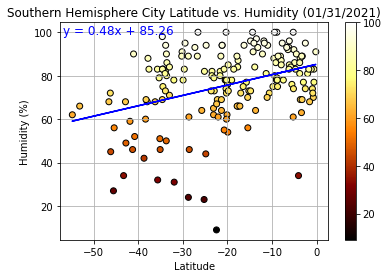

In [163]:
#Southern Humidity vs Latitude Linear Regression
x = south_data['Lat']
y = south_data['Humidity']
t = y
south_lat_humidity_plot = plt.scatter(x, y, c = t, cmap = 'afmhot', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere City Latitude vs. Humidity ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(-57, 99, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Southern_Hemisphere_Figures/south_lat_humidity_plot.png'
plt.savefig(output_data_file)

The r-value is 0.1050721865477758.


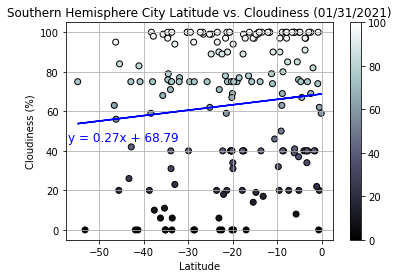

In [164]:
#Southern Cloudiness vs Latitude Linear Regression
x = south_data['Lat']
y = south_data['Cloudiness']
t = y
south_lat_cloudiness_plot = plt.scatter(x, y, c = t, cmap = 'bone', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere City Latitude vs. Cloudiness ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(-57, 45, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Southern_Hemisphere_Figures/south_lat_cloudiness_plot.png'
plt.savefig(output_data_file)

The r-value is -0.15511634669966481.


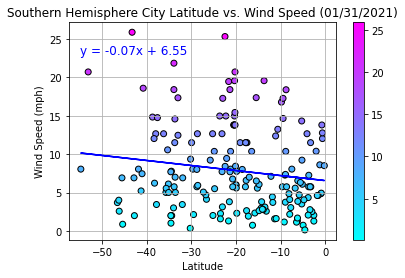

In [165]:
#Southern Wind Speed vs Latitude Linear Regression
x = south_data['Lat']
y = south_data['Wind_Speed']
t = y
south_lat_wind_speed_plot = plt.scatter(x, y, c = t, cmap = 'cool', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere City Latitude vs. Wind Speed ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(-55, 23, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Southern_Hemisphere_Figures/south_lat_wind_speed_plot.png'
plt.savefig(output_data_file)

In [166]:
#Northern Hemisphere
#finding southern hemisphere values
southern_hemisphere = clean_city_data[clean_city_data['Lat'] < 0].index 
print(southern_hemisphere)

#dropping southern values
north_data = clean_city_data.drop(southern_hemisphere, inplace = False)
north_data

Int64Index([  0,   1,   4,   7,   8,   9,  10,  12,  14,  15,
            ...
            512, 513, 515, 516, 518, 520, 524, 527, 532, 533],
           dtype='int64', name='City_ID', length=180)


,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
2,dikson,73.5069,80.5464,-26.90,79,61,8.81,RU,1612132792
3,longyearbyen,78.2186,15.6401,3.20,33,0,14.97,SJ,1612132792
5,tuktoyaktuk,69.4541,-133.0374,-23.80,69,75,2.30,CA,1612132793
6,olga,43.7444,135.2892,14.63,95,99,4.72,RU,1612132572
11,albany,42.6001,-73.9662,17.01,52,100,2.59,US,1612132545
...,...,...,...,...,...,...,...,...,...
526,aras,42.5617,-2.3560,57.20,58,0,24.16,ES,1612132953
528,karasjok,69.4719,25.5112,24.80,86,75,11.50,NO,1612132954
529,salo,45.6086,10.5310,45.00,93,40,1.14,IT,1612132954


The r-value is -0.8643262069404825.


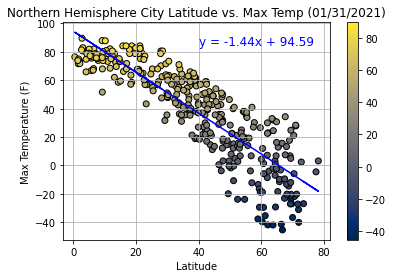

In [167]:
#Northern Max Temp vs Latitude Linear Regression
x = north_data['Lat']
y = north_data['Max_Temp']
t = y
north_lat_temp_plot = plt.scatter(x, y, c = t, cmap = 'cividis', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere City Latitude vs. Max Temp ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(40, 85, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Northern_Hemisphere_Figures/north_lat_temp_plot.png'
plt.savefig(output_data_file)

The r-value is 0.341444953057519.


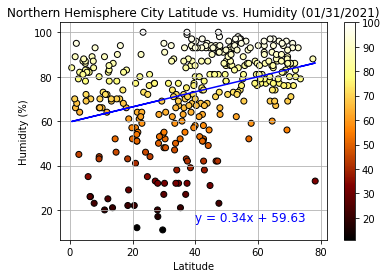

In [168]:
#Northern Humidity vs Latitude Linear Regression
x = north_data['Lat']
y = north_data['Humidity']
t = y
north_lat_humidity_plot = plt.scatter(x, y, c = t, cmap = 'afmhot', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere City Latitude vs. Humidity ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(40, 15, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Northern_Hemisphere_Figures/north_lat_humidity_plot.png'
plt.savefig(output_data_file)

The r-value is 0.39316861279383625.


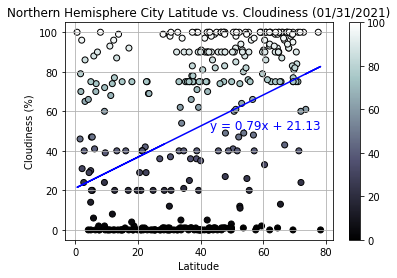

In [169]:
#Northern Cloudiness vs Latitude Linear Regression
x = north_data['Lat']
y = north_data['Cloudiness']
t = y
north_lat_cloudiness_plot = plt.scatter(x, y, c = t, cmap = 'bone', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere City Latitude vs. Cloudiness ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(43, 51, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Northern_Hemisphere_Figures/north_lat_cloudiness_plot.png'
plt.savefig(output_data_file)

The r-value is 0.0028923827427760423.


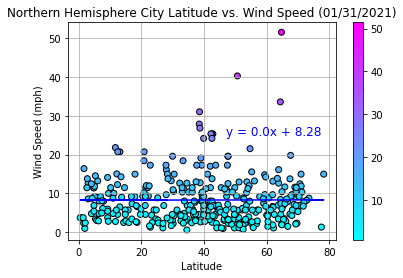

In [170]:
#Northern Wind Speed vs Latitude Linear Regression
x = north_data['Lat']
y = north_data['Wind_Speed']
t = y
north_lat_wind_speed_plot = plt.scatter(x, y, c = t, cmap = 'cool', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere City Latitude vs. Wind Speed ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(47, 25, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Northern_Hemisphere_Figures/north_lat_wind_speed_plot.png'
plt.savefig(output_data_file)